In [356]:
import pandas as pd
import numpy as np
import tensorflow as tf # Tensorflow
from tensorflow import keras # Keras
from tensorflow.keras import *
from tensorflow.keras.layers import *
np.set_printoptions(precision=3, suppress=True)
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import layers

In [357]:
data = pd.read_csv("output.csv")
data

,SimulationID,XStripID1,YStripID1,XStripEnergy1,YStripEnergy1,ResultPositionX,ResultPositionY,ResultPositionZ,ResultDirectionX,ResultDirectionY,ResultDirectionZ
0,8.0,6.0,37.0,131.56943,131.56943,-2.99192,0.57836,0.72860,-0.13524,0.23882,0.96160
1,15.0,46.0,37.0,35.50943,35.50943,1.67464,0.63627,0.10265,-0.29475,-0.05276,0.95412
2,30.0,4.0,17.0,952.73834,952.73834,-3.23524,-1.64841,0.48236,0.33486,-0.09646,-0.93732
3,31.0,24.0,41.0,317.82602,317.82602,-0.83824,1.07136,-0.69136,-0.44953,0.76733,0.45729
4,33.0,56.0,15.0,94.56897,94.56897,2.82458,-1.87114,0.37445,-0.04970,0.29646,0.95375
...,...,...,...,...,...,...,...,...,...,...,...
198750,999972.0,17.0,27.0,270.87976,270.87976,-1.72963,-0.51594,0.52537,0.39414,0.71541,-0.57693
198751,999973.0,33.0,7.0,674.07980,674.07980,0.13817,-2.78493,-0.39316,0.46734,0.57226,0.67388
198752,999979.0,38.0,30.0,127.41328,127.41328,0.76743,-0.19407,0.58384,0.76730,0.64123,-0.00855
198753,999986.0,15.0,25.0,592.78687,592.78687,-1.90253,-0.77731,0.66009,-0.31255,0.27885,0.90805


In [358]:
data = data.sample(frac=1, random_state=42) 
data

,SimulationID,XStripID1,YStripID1,XStripEnergy1,YStripEnergy1,ResultPositionX,ResultPositionY,ResultPositionZ,ResultDirectionX,ResultDirectionY,ResultDirectionZ
169922,855561.0,44.0,25.0,50.82244,50.82244,1.48912,-0.71715,-0.45203,0.95267,0.07632,0.29428
169965,855804.0,48.0,45.0,337.76404,337.76404,1.88593,1.60135,0.46918,-0.73499,-0.32884,0.59300
138680,697673.0,50.0,23.0,463.18457,463.18457,2.15121,-1.01253,-0.30933,0.02568,-0.99445,0.10207
24125,120786.0,8.0,60.0,203.66150,203.66150,-2.66342,3.34745,-0.30010,0.98316,-0.17123,0.06390
34573,173400.0,1.0,48.0,1218.76270,1218.76270,-3.56063,1.90751,-0.36553,0.94627,-0.20549,-0.24968
...,...,...,...,...,...,...,...,...,...,...,...
119879,603160.0,61.0,32.0,408.63370,408.63370,3.37712,0.09287,0.66840,-0.38220,0.90378,-0.19260
103694,521907.0,9.0,52.0,315.77716,315.77716,-2.60409,2.41815,-0.39433,-0.83692,-0.54672,0.02586
131932,664242.0,5.0,3.0,614.92145,614.92145,-3.04654,-3.31793,-0.44432,0.18102,0.92585,0.33172
146867,738867.0,3.0,44.0,501.23856,501.23856,-3.34298,1.48279,-0.34012,0.25490,-0.14712,0.95571


In [359]:
test_set = data.iloc[0:10000]
test_set

,SimulationID,XStripID1,YStripID1,XStripEnergy1,YStripEnergy1,ResultPositionX,ResultPositionY,ResultPositionZ,ResultDirectionX,ResultDirectionY,ResultDirectionZ
169922,855561.0,44.0,25.0,50.82244,50.82244,1.48912,-0.71715,-0.45203,0.95267,0.07632,0.29428
169965,855804.0,48.0,45.0,337.76404,337.76404,1.88593,1.60135,0.46918,-0.73499,-0.32884,0.59300
138680,697673.0,50.0,23.0,463.18457,463.18457,2.15121,-1.01253,-0.30933,0.02568,-0.99445,0.10207
24125,120786.0,8.0,60.0,203.66150,203.66150,-2.66342,3.34745,-0.30010,0.98316,-0.17123,0.06390
34573,173400.0,1.0,48.0,1218.76270,1218.76270,-3.56063,1.90751,-0.36553,0.94627,-0.20549,-0.24968
...,...,...,...,...,...,...,...,...,...,...,...
150768,758756.0,62.0,49.0,748.65480,748.65480,3.55174,2.02786,-0.36263,-0.49844,-0.44668,-0.74299
139456,701457.0,18.0,6.0,1267.68650,1267.68650,-1.53939,-2.94842,0.33684,-0.95369,0.27175,-0.12896
190393,957705.0,27.0,55.0,132.22581,132.22581,-0.50493,2.72254,-0.73270,0.08643,0.78200,0.61726
186560,938655.0,44.0,53.0,632.70170,632.70170,1.42174,2.44241,0.40365,0.57509,-0.76163,0.29864


In [360]:
data = data.iloc[10000:]

In [361]:
input_features = ["XStripID1", "YStripID2", "XStripEnergy", "YStripEnergy"]
output_features = ["ResultPositionX", "ResultPositionY", "ResultDirectionX", "ResultDirectionY"]

In [362]:
#train_dataset = data.sample(frac=0.8, random_state=0)
#test_dataset = data.drop(train_dataset.index)

In [363]:
data

,SimulationID,XStripID1,YStripID1,XStripEnergy1,YStripEnergy1,ResultPositionX,ResultPositionY,ResultPositionZ,ResultDirectionX,ResultDirectionY,ResultDirectionZ
85252,429363.0,0.0,21.0,1537.02420,1536.89490,-3.66483,-1.27322,0.10841,0.35404,0.92925,0.10557
72046,362451.0,20.0,56.0,273.59830,273.59830,-1.36955,2.78918,0.24203,0.09391,0.98615,-0.13669
19453,96998.0,24.0,51.0,2035.34380,2035.34380,-0.86194,2.21361,0.43770,0.16253,0.19438,0.96737
40987,206092.0,36.0,41.0,637.51460,637.51460,0.50680,1.08080,0.12328,-0.24945,-0.89635,-0.36652
71134,357908.0,53.0,25.0,267.49377,267.49377,2.52852,-0.80125,-0.09942,-0.83244,-0.53349,-0.14978
...,...,...,...,...,...,...,...,...,...,...,...
119879,603160.0,61.0,32.0,408.63370,408.63370,3.37712,0.09287,0.66840,-0.38220,0.90378,-0.19260
103694,521907.0,9.0,52.0,315.77716,315.77716,-2.60409,2.41815,-0.39433,-0.83692,-0.54672,0.02586
131932,664242.0,5.0,3.0,614.92145,614.92145,-3.04654,-3.31793,-0.44432,0.18102,0.92585,0.33172
146867,738867.0,3.0,44.0,501.23856,501.23856,-3.34298,1.48279,-0.34012,0.25490,-0.14712,0.95571


In [364]:
import pandas as pd

column_names = [
    "XStripEnergy1", "YStripEnergy1", "ResultPositionX", "ResultPositionY", 
    "ResultDirectionX", "ResultDirectionY", "XStripID1", "YStripID1"
]

stats = {"min": {}, "max": {},}

for col in column_names:
    stats["min"][col] = data[col].min()
    stats["max"][col] = data[col].max()
    data[col] = (data[col]) / (data[col].max() - data[col].min())

# Convert stats to a DataFrame for better visualization
stats_df = pd.DataFrame(stats).T

print(stats_df)

data

     XStripEnergy1  YStripEnergy1  ResultPositionX  ResultPositionY  \
min         9.8116        9.76891         -3.99813         -3.99686   
max      7750.9663     7750.96630          3.99558          3.99777   

     ResultDirectionX  ResultDirectionY  XStripID1  YStripID1  
min          -1.00000          -0.99998        0.0        0.0  
max           0.99999           0.99998       63.0       63.0  


/var/folders/wr/p4g_vhcn34g6101bsy9rmsd40000gn/T/ipykernel_79685/3717281433.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col] = (data[col]) / (data[col].max() - data[col].min())


,SimulationID,XStripID1,YStripID1,XStripEnergy1,YStripEnergy1,ResultPositionX,ResultPositionY,ResultPositionZ,ResultDirectionX,ResultDirectionY,ResultDirectionZ
85252,429363.0,0.000000,0.333333,0.198552,0.198535,-0.458464,-0.159259,0.10841,0.177021,0.464634,0.10557
72046,362451.0,0.317460,0.888889,0.035343,0.035343,-0.171328,0.348882,0.24203,0.046955,0.493085,-0.13669
19453,96998.0,0.380952,0.809524,0.262925,0.262924,-0.107827,0.276887,0.43770,0.081265,0.097192,0.96737
40987,206092.0,0.571429,0.650794,0.082354,0.082353,0.063400,0.135191,0.12328,-0.124726,-0.448184,-0.36652
71134,357908.0,0.841270,0.396825,0.034555,0.034555,0.316314,-0.100224,-0.09942,-0.416222,-0.266750,-0.14978
...,...,...,...,...,...,...,...,...,...,...,...
119879,603160.0,0.968254,0.507937,0.052787,0.052787,0.422472,0.011617,0.66840,-0.191101,0.451899,-0.19260
103694,521907.0,0.142857,0.825397,0.040792,0.040792,-0.325767,0.302472,-0.39433,-0.418462,-0.273365,0.02586
131932,664242.0,0.079365,0.047619,0.079435,0.079435,-0.381117,-0.415020,-0.44432,0.090510,0.462934,0.33172
146867,738867.0,0.047619,0.698413,0.064750,0.064749,-0.418201,0.185473,-0.34012,0.127451,-0.073561,0.95571


In [365]:
X = data.iloc[0:,[1, 2, 3, 4]]
X

,XStripID1,YStripID1,XStripEnergy1,YStripEnergy1
85252,0.000000,0.333333,0.198552,0.198535
72046,0.317460,0.888889,0.035343,0.035343
19453,0.380952,0.809524,0.262925,0.262924
40987,0.571429,0.650794,0.082354,0.082353
71134,0.841270,0.396825,0.034555,0.034555
...,...,...,...,...
119879,0.968254,0.507937,0.052787,0.052787
103694,0.142857,0.825397,0.040792,0.040792
131932,0.079365,0.047619,0.079435,0.079435
146867,0.047619,0.698413,0.064750,0.064749


In [366]:
y = data.iloc[0:,[5, 6, 8, 9]]
y

,ResultPositionX,ResultPositionY,ResultDirectionX,ResultDirectionY
85252,-0.458464,-0.159259,0.177021,0.464634
72046,-0.171328,0.348882,0.046955,0.493085
19453,-0.107827,0.276887,0.081265,0.097192
40987,0.063400,0.135191,-0.124726,-0.448184
71134,0.316314,-0.100224,-0.416222,-0.266750
...,...,...,...,...
119879,0.422472,0.011617,-0.191101,0.451899
103694,-0.325767,0.302472,-0.418462,-0.273365
131932,-0.381117,-0.415020,0.090510,0.462934
146867,-0.418201,0.185473,0.127451,-0.073561


In [367]:
X_train, X_dev, y_train, y_dev = train_test_split(X, y, test_size = 0.08, random_state = 42)


X_train.shape

(173654, 4)

In [368]:
model = keras.Sequential([
      layers.Dense(4, activation='relu', input_shape = (4,)),
      layers.Dense(4, activation='relu'),
      layers.Dense(4)
  ])
opt = keras.optimizers.Adam(learning_rate=0.001)

# Compile model 
model.compile(optimizer = opt, loss = "mse", metrics = ["root_mean_squared_error"])

# Model summary
model.summary()

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_29 (Dense)                │ (None, 4)              │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 4)              │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 4)              │            20 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 60 (240.00 B)

 Trainable params: 60 (240.00 B)

 Non-trainable params: 0 (0.00 B)

In [369]:
history = model.fit(
    X_train, y_train,
    epochs=10,  # You can change this
    batch_size=100,  # Adjust batch size as needed
    validation_data=(X_dev, y_dev),  # Use test data for validation
    verbose=1  # Shows progress during training
)

Epoch 1/10
1737/1737 ━━━━━━━━━━━━━━━━━━━━ 1s 431us/step - loss: 0.0648 - root_mean_squared_error: 0.2537 - val_loss: 0.0405 - val_root_mean_squared_error: 0.2011
Epoch 2/10
1737/1737 ━━━━━━━━━━━━━━━━━━━━ 1s 424us/step - loss: 0.0405 - root_mean_squared_error: 0.2011 - val_loss: 0.0404 - val_root_mean_squared_error: 0.2010
Epoch 3/10
1737/1737 ━━━━━━━━━━━━━━━━━━━━ 1s 449us/step - loss: 0.0405 - root_mean_squared_error: 0.2012 - val_loss: 0.0404 - val_root_mean_squared_error: 0.2010
Epoch 4/10
1737/1737 ━━━━━━━━━━━━━━━━━━━━ 1s 438us/step - loss: 0.0405 - root_mean_squared_error: 0.2013 - val_loss: 0.0404 - val_root_mean_squared_error: 0.2010
Epoch 5/10
1737/1737 ━━━━━━━━━━━━━━━━━━━━ 1s 388us/step - loss: 0.0404 - root_mean_squared_error: 0.2011 - val_loss: 0.0404 - val_root_mean_squared_error: 0.2010
Epoch 6/10
1737/1737 ━━━━━━━━━━━━━━━━━━━━ 1s 394us/step - loss: 0.0405 - root_mean_squared_error: 0.2013 - val_loss: 0.0404 - val_root_mean_squared_error: 0.2010
Epoch 7/10
1737/1737 ━━━━━━━

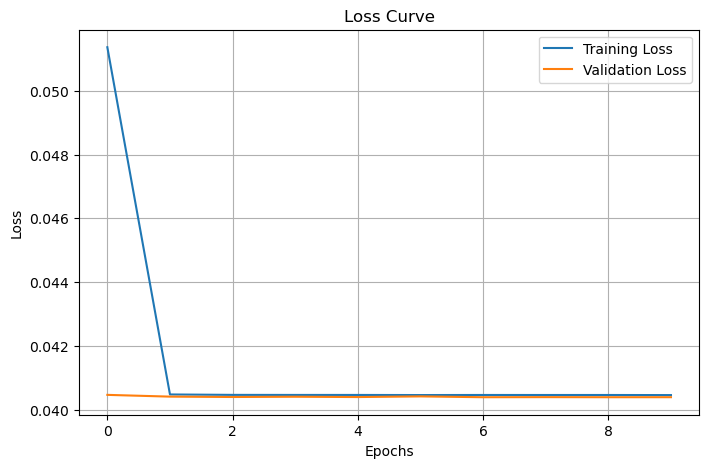

In [370]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.legend()
plt.grid()
plt.show()

In [371]:
stats_df

,XStripEnergy1,YStripEnergy1,ResultPositionX,ResultPositionY,ResultDirectionX,ResultDirectionY,XStripID1,YStripID1
min,9.8116,9.76891,-3.99813,-3.99686,-1.00000,-0.99998,0.0,0.0
max,7750.9663,7750.96630,3.99558,3.99777,0.99999,0.99998,63.0,63.0


In [372]:
X_test = test_set.iloc[0:,[1, 2, 3, 4]]
X_test

,XStripID1,YStripID1,XStripEnergy1,YStripEnergy1
169922,44.0,25.0,50.82244,50.82244
169965,48.0,45.0,337.76404,337.76404
138680,50.0,23.0,463.18457,463.18457
24125,8.0,60.0,203.66150,203.66150
34573,1.0,48.0,1218.76270,1218.76270
...,...,...,...,...
150768,62.0,49.0,748.65480,748.65480
139456,18.0,6.0,1267.68650,1267.68650
190393,27.0,55.0,132.22581,132.22581
186560,44.0,53.0,632.70170,632.70170


In [373]:
stats_X_test = stats_df.iloc[0:,[6,7,1,0]]
for col in stats_X_test:
    X_test[col] = (X_test[col]) / (stats_X_test[col][1] -  stats_X_test[col][0])
X_test

/var/folders/wr/p4g_vhcn34g6101bsy9rmsd40000gn/T/ipykernel_79685/1320709737.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  X_test[col] = (X_test[col]) / (stats_X_test[col][1] -  stats_X_test[col][0])


,XStripID1,YStripID1,XStripEnergy1,YStripEnergy1
169922,0.698413,0.396825,0.006565,0.006565
169965,0.761905,0.714286,0.043632,0.043632
138680,0.793651,0.365079,0.059834,0.059834
24125,0.126984,0.952381,0.026309,0.026309
34573,0.015873,0.761905,0.157439,0.157439
...,...,...,...,...
150768,0.984127,0.777778,0.096711,0.096710
139456,0.285714,0.095238,0.163759,0.163758
190393,0.428571,0.873016,0.017081,0.017081
186560,0.698413,0.841270,0.081732,0.081732


In [374]:
y_test = test_set.iloc[0:,[5, 6, 8, 9]]
y_test

,ResultPositionX,ResultPositionY,ResultDirectionX,ResultDirectionY
169922,1.48912,-0.71715,0.95267,0.07632
169965,1.88593,1.60135,-0.73499,-0.32884
138680,2.15121,-1.01253,0.02568,-0.99445
24125,-2.66342,3.34745,0.98316,-0.17123
34573,-3.56063,1.90751,0.94627,-0.20549
...,...,...,...,...
150768,3.55174,2.02786,-0.49844,-0.44668
139456,-1.53939,-2.94842,-0.95369,0.27175
190393,-0.50493,2.72254,0.08643,0.78200
186560,1.42174,2.44241,0.57509,-0.76163


In [375]:
stats_Y_test = stats_df.iloc[0:,[2,3,4,5]]
for col in stats_Y_test:
    y_test[col] = (y_test[col]) / (stats_Y_test[col][1] -  stats_Y_test[col][0])
y_test

/var/folders/wr/p4g_vhcn34g6101bsy9rmsd40000gn/T/ipykernel_79685/1787739012.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_test[col] = (y_test[col]) / (stats_Y_test[col][1] -  stats_Y_test[col][0])


,ResultPositionX,ResultPositionY,ResultDirectionX,ResultDirectionY
169922,0.186286,-0.089704,0.476337,0.038161
169965,0.235927,0.200303,-0.367497,-0.164423
138680,0.269113,-0.126651,0.012840,-0.497235
24125,-0.333189,0.418712,0.491582,-0.085617
34573,-0.445429,0.238599,0.473137,-0.102747
...,...,...,...,...
150768,0.444317,0.253653,-0.249221,-0.223344
139456,-0.192575,-0.368800,-0.476847,0.135878
190393,-0.063166,0.340546,0.043215,0.391008
186560,0.177857,0.305506,0.287546,-0.380823


In [376]:
predictions = model.predict(X_test)
predictions

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 251us/step


array([[ 0.178, -0.096, -0.012,  0.006],
       [ 0.236,  0.194, -0.015, -0.013],
       [ 0.264, -0.125, -0.017,  0.008],
       ...,
       [-0.068,  0.34 ,  0.005, -0.022],
       [ 0.178,  0.31 , -0.012, -0.021],
       [-0.443,  0.239,  0.031, -0.015]], dtype=float32)

In [377]:
y_test

,ResultPositionX,ResultPositionY,ResultDirectionX,ResultDirectionY
169922,0.186286,-0.089704,0.476337,0.038161
169965,0.235927,0.200303,-0.367497,-0.164423
138680,0.269113,-0.126651,0.012840,-0.497235
24125,-0.333189,0.418712,0.491582,-0.085617
34573,-0.445429,0.238599,0.473137,-0.102747
...,...,...,...,...
150768,0.444317,0.253653,-0.249221,-0.223344
139456,-0.192575,-0.368800,-0.476847,0.135878
190393,-0.063166,0.340546,0.043215,0.391008
186560,0.177857,0.305506,0.287546,-0.380823


In [378]:
scaled_y_pred = abs(y_test - predictions)
scaled_y_pred

,ResultPositionX,ResultPositionY,ResultDirectionX,ResultDirectionY
169922,0.008292,0.006117,0.487852,0.032382
169965,0.000405,0.006067,0.352018,0.151366
138680,0.004624,0.001939,0.030224,0.504793
24125,0.009210,0.006233,0.467850,0.059039
34573,0.001472,0.000610,0.442473,0.087493
...,...,...,...,...
150768,0.006759,0.001482,0.220008,0.206324
139456,0.005544,0.001275,0.490933,0.111950
190393,0.004668,0.000998,0.038118,0.413153
186560,0.000319,0.004970,0.299110,0.360301


In [379]:
y_pred_scaled_df = pd.DataFrame(
    scaled_y_pred, 
    columns=["ResultPositionX", "ResultPositionY", "ResultDirectionX", "ResultDirectionY"]
)

# 3. Create a copy to hold the rescaled predictions
y_pred_rescaled_df = y_pred_scaled_df.copy()

# 4. Loop through each column, applying the inverse of min-max scaling
for col in y_pred_rescaled_df.columns:
    # Original value = (scaled_value * (max - min)) + min
    y_pred_rescaled_df[col] = (
        y_pred_rescaled_df[col] * (stats_Y_test.loc["max", col] - stats_Y_test.loc["min", col])
    )

# Now y_pred_rescaled_df contains predictions back in the original scale
y_pred_rescaled_df


,ResultPositionX,ResultPositionY,ResultDirectionX,ResultDirectionY
169922,0.066281,0.048906,0.975699,0.064762
169965,0.003241,0.048507,0.704032,0.302725
138680,0.036963,0.015499,0.060448,1.009566
24125,0.073626,0.049830,0.935695,0.118076
34573,0.011767,0.004876,0.884941,0.174982
...,...,...,...,...
150768,0.054026,0.011850,0.440013,0.412640
139456,0.044313,0.010191,0.981862,0.223895
190393,0.037315,0.007980,0.076235,0.826290
186560,0.002553,0.039737,0.598217,0.720588


(array([1111., 1096., 1073., 1088., 1034., 1040., 1033., 1082., 1031.,
         412.]),
 array([ 0.001,  6.073, 12.144, 18.215, 24.287, 30.358, 36.429, 42.501,
        48.572, 54.643, 60.715]),
 <BarContainer object of 10 artists>)

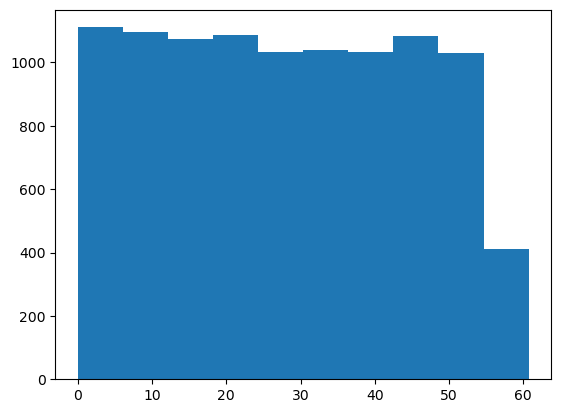

In [380]:
plt.hist(y_pred_rescaled_df["ResultDirectionX"]/3.14*180)